In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import cohen_kappa_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.experimental import enable_halving_search_cv
#from sklearn.model_selection import HalvingRandomSearchCV


In [2]:
#test_run = True
test_run = False

In [3]:
#df = pd.read_csv("Temp/df_proc_train_set_xgb.csv")
df = pd.read_csv("Temp/df_train_set_mfp16384.csv")

In [4]:
df['sol_category'] = pd.to_numeric(df['sol_category'], downcast='integer')
df

,Id,smiles,sol_category,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,...,rdkit_desc_fr_quatN,rdkit_desc_fr_sulfide,rdkit_desc_fr_sulfonamd,rdkit_desc_fr_sulfone,rdkit_desc_fr_term_acetylene,rdkit_desc_fr_tetrazole,rdkit_desc_fr_thiazole,rdkit_desc_fr_thiophene,rdkit_desc_fr_unbrch_alkane,rdkit_desc_fr_urea
0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70706,EOS37839,O=C(NCCCc1nc(=O)[nH][nH]1)[C@H]1CCC(F)(F)C1,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70707,EOS2088,Cc1ccc(C(=O)NC2CCCC2)cc1S(=O)(=O)N1CCOCC1,2,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70708,EOS10587,COCCN1CCC(CN(C)S(=O)(=O)c2cccc(C(F)(F)F)c2)C1,2,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70709,EOS40533,O=C(Nc1ccc(F)cc1)NC1CCN(C(=O)Cc2cnn(-c3ccccc3)...,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:

from rdkit import Chem
from rdkit.Chem import Draw

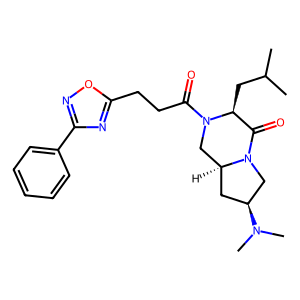

In [6]:
mol = Chem.MolFromSmiles(df['smiles'][50])
Draw.MolToImage(mol)

In [7]:
df['sol_category'].value_counts()

2    65835
1     2835
0     2041
Name: sol_category, dtype: int64

In [8]:
if test_run:
    df, _, __, ___ = train_test_split(df, df['sol_category'], train_size=500, stratify=df['sol_category'])

In [9]:
df['sol_category'].value_counts(normalize=True)

2    0.931043
1    0.040093
0    0.028864
Name: sol_category, dtype: float64

In [10]:
#y = pd.read_excel(xl, 'y', header = None)

In [11]:
# hypothesis fuction
# takes input variables and theta, return calculated output variable

In [12]:
print(len(df))
#print(len(y))
X = df.copy(deep=True)
X.drop(columns=['Id', 'smiles', 'sol_category'], inplace=True)
X

70711


,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,ecfp_8,ecfp_9,...,rdkit_desc_fr_quatN,rdkit_desc_fr_sulfide,rdkit_desc_fr_sulfonamd,rdkit_desc_fr_sulfone,rdkit_desc_fr_term_acetylene,rdkit_desc_fr_tetrazole,rdkit_desc_fr_thiazole,rdkit_desc_fr_thiophene,rdkit_desc_fr_unbrch_alkane,rdkit_desc_fr_urea
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70706,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70707,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70708,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70709,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Only exfp

In [13]:
X_ecfp = df.copy(deep=True)
drop_list_desc = [column for column in X_ecfp.columns if (column.startswith('example_') or column.startswith('rdkit_desc_'))]

# Drop features 
X_ecfp.drop(drop_list_desc, axis=1, inplace=True)
X_ecfp.drop(columns=['Id', 'smiles', 'sol_category'], inplace=True)
X_ecfp

,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,ecfp_8,ecfp_9,...,ecfp_16374,ecfp_16375,ecfp_16376,ecfp_16377,ecfp_16378,ecfp_16379,ecfp_16380,ecfp_16381,ecfp_16382,ecfp_16383
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Only descriptors

In [14]:
X_desc = df.copy(deep=True)
drop_list_MFP = [column for column in X_desc.columns if column.startswith('ecfp_')]

# Drop features 
X_desc.drop(drop_list_MFP, axis=1, inplace=True)
X_desc.drop(columns=['Id', 'smiles', 'sol_category'], inplace=True)
X_desc

,example_SlogP,example_SMR,example_LabuteASA,example_TPSA,example_AMW,example_ExactMW,example_NumLipinskiHBA,example_NumLipinskiHBD,example_NumRotatableBonds,example_NumHBD,...,rdkit_desc_fr_quatN,rdkit_desc_fr_sulfide,rdkit_desc_fr_sulfonamd,rdkit_desc_fr_sulfone,rdkit_desc_fr_term_acetylene,rdkit_desc_fr_tetrazole,rdkit_desc_fr_thiazole,rdkit_desc_fr_thiophene,rdkit_desc_fr_unbrch_alkane,rdkit_desc_fr_urea
0,2.60302,103.0537,165.369611,79.18,399.405,399.161915,8,1,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.06012,92.5500,138.075962,36.44,323.506,323.203133,4,0,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.63144,79.5199,121.160414,63.13,291.376,291.104148,5,2,4,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5.24150,103.2060,152.978596,34.89,364.942,364.137612,3,0,3,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.15700,94.8512,146.053660,69.04,336.395,336.158626,6,1,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70706,0.58220,62.8271,107.530938,90.64,274.271,274.124132,6,3,5,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70707,1.68832,90.4790,142.779643,75.71,352.456,352.145678,6,1,4,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70708,2.29420,87.6828,145.965588,49.85,380.432,380.138148,5,0,7,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70709,3.36660,115.4244,179.414668,79.26,421.476,421.191403,7,2,5,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### only example descriptors

In [15]:
X_example = X_desc.copy(deep=True)
drop_list_ex = [column for column in X_example.columns if column.startswith('rdkit_desc_')]

# Drop features 
X_example.drop(drop_list_ex, axis=1, inplace=True)
#X_example.drop(columns=['Id', 'smiles', 'sol_category'], inplace=True)
X_example

,example_SlogP,example_SMR,example_LabuteASA,example_TPSA,example_AMW,example_ExactMW,example_NumLipinskiHBA,example_NumLipinskiHBD,example_NumRotatableBonds,example_NumHBD,...,example_VABC Volume Descriptor,example_Largest Chain,example_Largest Pi Chain,example_Petitjean Number,example_Lipinski's Rule of Five,example_Topological Polar Surface Area,example_Vertex adjacency information magnitude,example_XLogP,example_Zagreb Index,example_Rotatable Bonds Count (non terminal)
0,2.60302,103.0537,165.369611,79.18,399.405,399.161915,8,1,3,1,...,329.228869,3.0,12.0,0.500000,0.0,79.18,6.000000,2.599,154.0,3.0
1,3.06012,92.5500,138.075962,36.44,323.506,323.203133,4,0,6,0,...,319.355435,5.0,5.0,0.500000,0.0,64.68,5.523562,1.417,110.0,6.0
2,1.63144,79.5199,121.160414,63.13,291.376,291.104148,5,2,4,2,...,257.448332,7.0,13.0,0.500000,0.0,91.37,5.392317,0.645,100.0,4.0
3,5.24150,103.2060,152.978596,34.89,364.942,364.137612,3,0,3,0,...,350.252336,3.0,7.0,0.461538,1.0,57.97,5.643856,6.034,126.0,5.0
4,3.15700,94.8512,146.053660,69.04,336.395,336.158626,6,1,6,1,...,305.250156,6.0,14.0,0.500000,0.0,69.04,5.754888,3.222,126.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70706,0.58220,62.8271,107.530938,90.64,274.271,274.124132,6,3,5,3,...,239.892608,6.0,6.0,0.500000,0.0,82.59,5.321928,1.272,96.0,5.0
70707,1.68832,90.4790,142.779643,75.71,352.456,352.145678,6,1,4,1,...,319.736438,3.0,13.0,0.500000,0.0,84.09,5.700440,1.600,126.0,4.0
70708,2.29420,87.6828,145.965588,49.85,380.432,380.138148,5,0,7,0,...,326.845820,4.0,10.0,0.500000,0.0,58.23,5.700440,2.078,128.0,8.0
70709,3.36660,115.4244,179.414668,79.26,421.476,421.191403,7,2,5,2,...,376.505497,3.0,11.0,0.500000,0.0,79.26,6.087463,2.887,160.0,5.0


#### only rdkit descriptors

In [16]:
X_rdd = X_desc.copy(deep=True)
drop_list_rd = [column for column in X_rdd.columns if column.startswith('example_')]

# Drop features 
X_rdd.drop(drop_list_rd, axis=1, inplace=True)
#X_example.drop(columns=['Id', 'smiles', 'sol_category'], inplace=True)
X_rdd

,rdkit_desc_MaxEStateIndex,rdkit_desc_MinEStateIndex,rdkit_desc_MaxAbsEStateIndex,rdkit_desc_MinAbsEStateIndex,rdkit_desc_qed,rdkit_desc_MolWt,rdkit_desc_HeavyAtomMolWt,rdkit_desc_ExactMolWt,rdkit_desc_NumValenceElectrons,rdkit_desc_MaxPartialCharge,...,rdkit_desc_fr_quatN,rdkit_desc_fr_sulfide,rdkit_desc_fr_sulfonamd,rdkit_desc_fr_sulfone,rdkit_desc_fr_term_acetylene,rdkit_desc_fr_tetrazole,rdkit_desc_fr_thiazole,rdkit_desc_fr_thiophene,rdkit_desc_fr_unbrch_alkane,rdkit_desc_fr_urea
0,13.751480,-0.805113,13.751480,0.046085,0.732517,399.405,380.253,399.161915,150.0,0.321549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,12.524029,0.234919,12.524029,0.234919,0.807124,323.506,294.274,323.203134,124.0,0.229004,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,12.317465,-0.223009,12.317465,0.019061,0.899102,291.376,274.240,291.104148,106.0,0.254519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,12.357761,-0.382235,12.357761,0.149177,0.698158,364.942,339.742,364.137612,130.0,0.286663,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.704152,-0.151369,12.704152,0.131009,0.750601,336.395,316.235,336.158626,128.0,0.251455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70706,12.941416,-2.697880,12.941416,0.208737,0.685975,274.271,258.143,274.124132,106.0,0.360787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70707,12.866088,-3.602640,12.866088,0.194141,0.894636,352.456,328.264,352.145678,132.0,0.251038,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70708,12.805377,-4.572020,12.805377,0.155028,0.728420,380.432,357.248,380.138148,142.0,0.415953,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70709,12.950221,-0.351472,12.950221,0.008955,0.663055,421.476,397.284,421.191403,160.0,0.318953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
y = df.iloc[:, 2]

In [18]:
y

0        0
1        0
2        0
3        0
4        0
        ..
70706    2
70707    2
70708    2
70709    2
70710    2
Name: sol_category, Length: 70711, dtype: int8

In [19]:
y.unique()

array([0, 1, 2], dtype=int8)

## StandardScaler

In [20]:
#scaler = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X)
#X = scaler.fit_transform(X)

## split

In [21]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1,  shuffle=True, stratify=y)

In [22]:
# find out where NaN is, remove in processing

## multi-class logistic regression

In [23]:
#clf = LogisticRegression(random_state=0, max_iter=1000, verbose=1).fit(X_train, y_train)

In [24]:
#clf.predict(X[:2, :])

In [25]:
#clf.predict_proba(X[:2, :])

In [26]:
#y_prediction = clf.predict(X_test)

In [27]:
#df_y = pd.DataFrame(y_prediction)

In [28]:
# Stricter feature selection
### 1. just use ecfp/rdkit+example
### 2. Hyperparatuning (StratifiedKfold+RandomizedSearchCV on X_train and y_train) (max_iter, solver, penalty,C)

# for dataset over all_dataset
#   hyperparameter tuning()

In [29]:
from sklearn.utils import class_weight
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import cohen_kappa_score
from numpy import linspace

In [30]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [31]:
all_dataset = list()
all_dataset.append(X)
#all_dataset.append(X_ecfp)
#all_dataset.append(X_desc)
#all_dataset.append(X_example)
#all_dataset.append(X_rdd)

In [32]:

# setup parameters for xgboost
params = {}
#params['booster'] = 'gbtree' #['gbtree', 'gblinear', 'dart']
#params['objective'] = ['binary:logistic']
#params["eval_metric"] = ["error"]
params['eta'] = 0.001 #, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5] # boosting learning rate
params['gamma'] = 0.5 #linspace(0.000000001, 1.0, num=11) # min loss red recuired for further partition on leaf node
params['max_depth'] = 7 #np.arange(1, 11, 2) # max tree dept for base learners
params['n_estimators'] = 100 #np.arange(50, 550, 50) maybe 250 ??
params['min_child_weight'] = 1 # min sum of instance weight in a child
params['max_delta_step'] = 0 # max delta step allowed for each tree's weight estimate
params['subsample']= 0.5 #[0.5, 1] # subsample ratio of training instance
params['colsample_bytree'] = 1 # subsample ratio of columns when cunstructing each tree
#params['silent'] = [1]
#params['seed'] = [0] # = random_state ???
params['base_score'] = 0.5 # initial prediction score, global bias
#params['random_state'] = [0] # = seed ???
#params['scale_pos_weight'] = ratio
params['n_jobs'] = 5
params['eval_metric'] = 'mlogloss'




In [33]:
i = 1

for dataset in all_dataset:
    '''
    # apply StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True).fit(dataset)
    dataset = scaler.fit_transform(dataset)
    '''
    
    # split data set
    StratifiedKFold(n_splits=5)
    X_train, X_val, y_train, y_val = train_test_split(dataset, y, random_state=1,  shuffle=True, stratify=y)#, test_size=0.2, train_size=0.8)

    # define class weights
    classes_weights = class_weight.compute_sample_weight(
        class_weight='balanced',
        y=y_train
        )

    model = XGBClassifier(**params)

    model.fit(X_train, y_train, sample_weight=classes_weights)


    valPredictions = model.predict(X_val)

    #quad kappa score
    sk_quad_kappa = cohen_kappa_score(y_val, valPredictions, weights='quadratic')
    
    #define data set name
    if i == 1:
        dataset_name = 'X'
    #elif i == 2:
        #dataset_name = 'X_ecfp'
    #elif i == 3:
        #dataset_name = 'X_desc'
    #i +=1
    
    # printing results
    print(f'quadratic kappa score of data set {dataset_name}: {sk_quad_kappa}')



quadratic kappa score of data set X: 0.08343579910705456


In [34]:
#0.08294971322439237
#0.08306
#0.08306290235305758 ecfp 8192
#0.08343579910705456 ecfp 16384, test: 0,08411

In [35]:

#real_test_set = pd.read_csv('Temp/df_proc_test_set_xgb.csv')
real_test_set  = pd.read_csv("Temp/df_test_set_mfp16384.csv")
sub_template = pd.read_csv('Data/submission_template_rdm.csv')
(sub_template['Id'] == real_test_set['Id']).value_counts()


True    30307
Name: Id, dtype: int64

In [36]:

real_test_set.drop(columns=['Id', 'smiles'], inplace=True)

'''
# apply StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True).fit(real_test_set)
real_test_set = scaler.fit_transform(real_test_set)
'''

# prediction
realtestPredictions = model.predict(real_test_set)
sub_template['pred'] = realtestPredictions


In [37]:
set(realtestPredictions)

{0, 1, 2}

In [38]:

sub_template['pred'].value_counts()


2    25533
1     3011
0     1763
Name: pred, dtype: int64

In [39]:
sub_template

,Id,pred
0,EOS10000,2
1,EOS100001,0
2,EOS100004,2
3,EOS100005,0
4,EOS100008,2
...,...,...
30302,EOS97822,2
30303,EOS97834,2
30304,EOS97889,1
30305,EOS97969,0


## save as csv

In [50]:
sub_template.to_csv('Submissions/submission_01_12_C-men.csv', index=False)

In [51]:
model.feature_importances_

array([0.        , 0.0004632 , 0.        , ..., 0.00075063, 0.00043497,
       0.00057515], dtype=float32)

In [52]:
X

,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,ecfp_8,ecfp_9,...,rdkit_desc_fr_quatN,rdkit_desc_fr_sulfide,rdkit_desc_fr_sulfonamd,rdkit_desc_fr_sulfone,rdkit_desc_fr_term_acetylene,rdkit_desc_fr_tetrazole,rdkit_desc_fr_thiazole,rdkit_desc_fr_thiophene,rdkit_desc_fr_unbrch_alkane,rdkit_desc_fr_urea
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70706,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70707,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70708,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70709,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
#dataset.columns

In [54]:
importance_df = pd.DataFrame(data={
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by=['importance'], ascending=False).head(40)

In [55]:
#importance_df.to_csv('Temp/most_important_features_xgb_names.csv')

In [56]:
#importance_df.to_csv('Temp/xgb_most_important_features.csv', index=False)

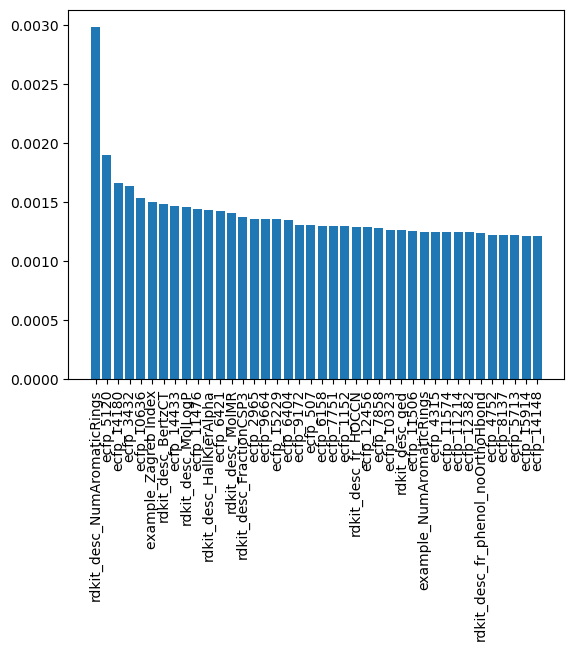

In [57]:
import matplotlib.pyplot as plt
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90)
plt.show()

In [48]:
dataset.loc[:,['rdkit_desc_NumAromaticRings']].value_counts()

rdkit_desc_NumAromaticRings
2.0                            32786
1.0                            18527
3.0                            15343
4.0                             2764
0.0                             1144
5.0                              137
6.0                               10
dtype: int64

In [49]:
dataset.loc[:,[ 'example_NumAromaticRings']].value_counts()

example_NumAromaticRings
2                           32784
1                           18527
3                           15344
4                            2764
0                            1144
5                             137
6                              10
8                               1
dtype: int64